In [1]:
# Tutorial By: Sashank Kapadia
# Topic Modeling in Python: Latent Dirichlet Allocation (LDA)
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [2]:
import pandas as pd
import os

# Instantiate a dataframe using RedditData
df = pd.read_csv('RedditData.csv')

In [3]:
import re

# Clean data by removing symbols and puncuations
df['titles_processed'] = \
df['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['titles_processed'] = \
df['titles_processed'].map(lambda x: x.lower())

In [4]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load in NLTK Stopwords
stop_words = stopwords.words('english')

# Stopwords added after viewing results
stop_words.extend(['help', 'get', 'make', 'use', 'good', 'bitcoin', 'btc', 'crypto',
                  'have', 'go', 'do', 'new', 'say', 'want', 'time', 'year', 'more', 'know', 'free', 'first', 'think', 'real',
                  'would', 'need', 'https', 'us', 'anyone', 'el', 'one', 'question'])
def sent_to_words(sentences):
    for sentence in sentences:
        # Create list of lowercased words from the sentence
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    # Return words to list if word is not in stopwords
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
# Create list object from new df column
data = df.titles_processed.values.tolist()
data_words = list(sent_to_words(data))
# Remove stopwords from list
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guest1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import gensim.corpora as corpora
# Create the dictionary using data_words
id2word = corpora.Dictionary(data_words)
texts = data_words
# Create a list that sets an id to word and frequency of that term
corpus = [id2word.doc2bow(text) for text in texts]

In [6]:
# Build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word = id2word, 
                                            num_topics=15, random_state = 20, update_every = 1,
                                            chunksize=1000, passes = 25, alpha = "auto")

In [7]:
# Visualizing Data

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Allow to run in-line and see visualization in Jyptiter
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

# Top 15 words
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14    -0.232938  0.314602       1        1  8.718640
2     -0.039256  0.372235       2        1  8.064588
5     -0.375973  0.108798       3        1  7.668214
0      0.119741  0.226717       4        1  7.471965
1      0.371598  0.092534       5        1  7.397393
3     -0.150823  0.094528       6        1  6.968569
8      0.112205 -0.366659       7        1  6.650633
12     0.229423  0.311068       8        1  6.430698
4     -0.125309 -0.342852       9        1  6.212593
10    -0.277414 -0.067141      10        1  6.137898
6      0.144876  0.015598      11        1  6.087290
9      0.364374 -0.146950      12        1  5.969430
7     -0.309864 -0.229494      13        1  5.916566
13     0.195814 -0.198116      14        1  5.468742
11    -0.026453 -0.184868      15        1  4.836781, topic_info=        Term        Freq       Total Category  logprob  loglift
6        buy  465.000000  465.000000  Default  30.0000  30.0000
58    wallet  422.000000  422.000000  Default  29.0000  29.0000
163      amp  352.000000  352.000000  Default  28.0000  28.0000
120   mining  300.000000  300.000000  Default  27.0000  27.0000
100    price  273.000000  273.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
1752    past   17.937418   19.022934  Topic15  -4.8736   2.9702
1259   extra   17.320533   18.406049  Topic15  -4.9086   2.9681
2379     que   16.669184   17.754699  Topic15  -4.9469   2.9658
404      end   31.654459   59.143094  Topic15  -4.3056   2.4038
109      see   36.459615   84.395206  Topic15  -4.1643   2.1896

[501 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
62        5  0.987839     accept
454       8  0.944805  according
0        11  0.989255    account
1058     12  0.985701   accounts
948      12  0.951406   actually
...     ...       ...        ...
19       11  0.995281      worth
1489      9  0.952091     wright
491      13  0.986667      years
968       2  0.959226        yes
157      12  0.979589    youtube

[482 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 3, 6, 1, 2, 4, 9, 13, 5, 11, 7, 10, 8, 14, 12])

In [8]:
# Show the LDA Model
lda_model

In [9]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [11]:
# Create a single string using the titles in the RedditData csv file

text = ""

for i in df.title:
    text += i + ","

In [12]:
# Font can be found here:
# https://www.dafont.com/techfont.font
font_path = 'C:/Users/guest1/Desktop/techfont/Techfont.ttf'

# Bitcoin jpg can be found here:
# https://icon-library.com/icon/bitcoin-icon-27.html
mask = np.array(Image.open('C:/Users/guest1/Pictures/bitcoin-icon-27.jpg'))

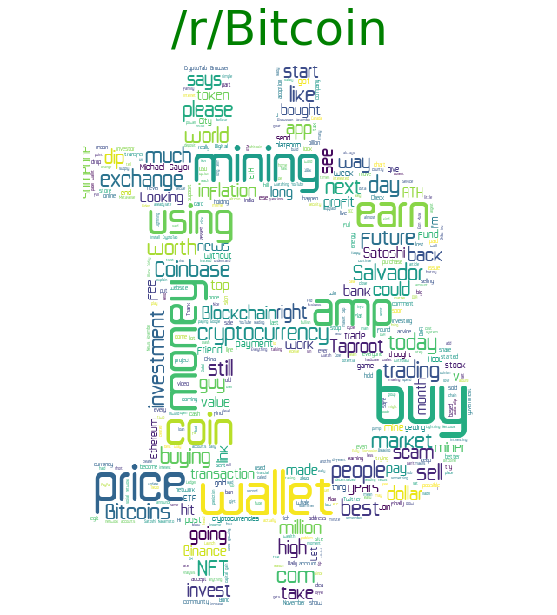

In [13]:
# Create the wordcloud object. 
wc = WordCloud(stopwords=stop_words, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256)
# Generate the WC object with created string
wc.generate(text)
# Increase the size of the figure to be printed
plt.figure(figsize=(20,10))

# https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
# interpolation manipulates how the text is displayed on the image
plt.imshow(wc, interpolation="nearest")
# Make the axis invisible
plt.axis('off')
# Set title of the image
plt.title("/r/Bitcoin", fontsize = 48, color="Green", pad=20)

# Send it
plt.show()